In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from gempy.core.data import Grid

## The Grid Class

The grid class will interact with the rest of data classes and grid subclases. Its main purpose is to feed coordinates XYZ to the interpolator.

In [4]:
grid = Grid()

The most important attribute of Grid is `values` (and `values_r` which are the values rescaled) which are the 3D points in space that kriging will be evaluated on. This array will be feed by "grid types":

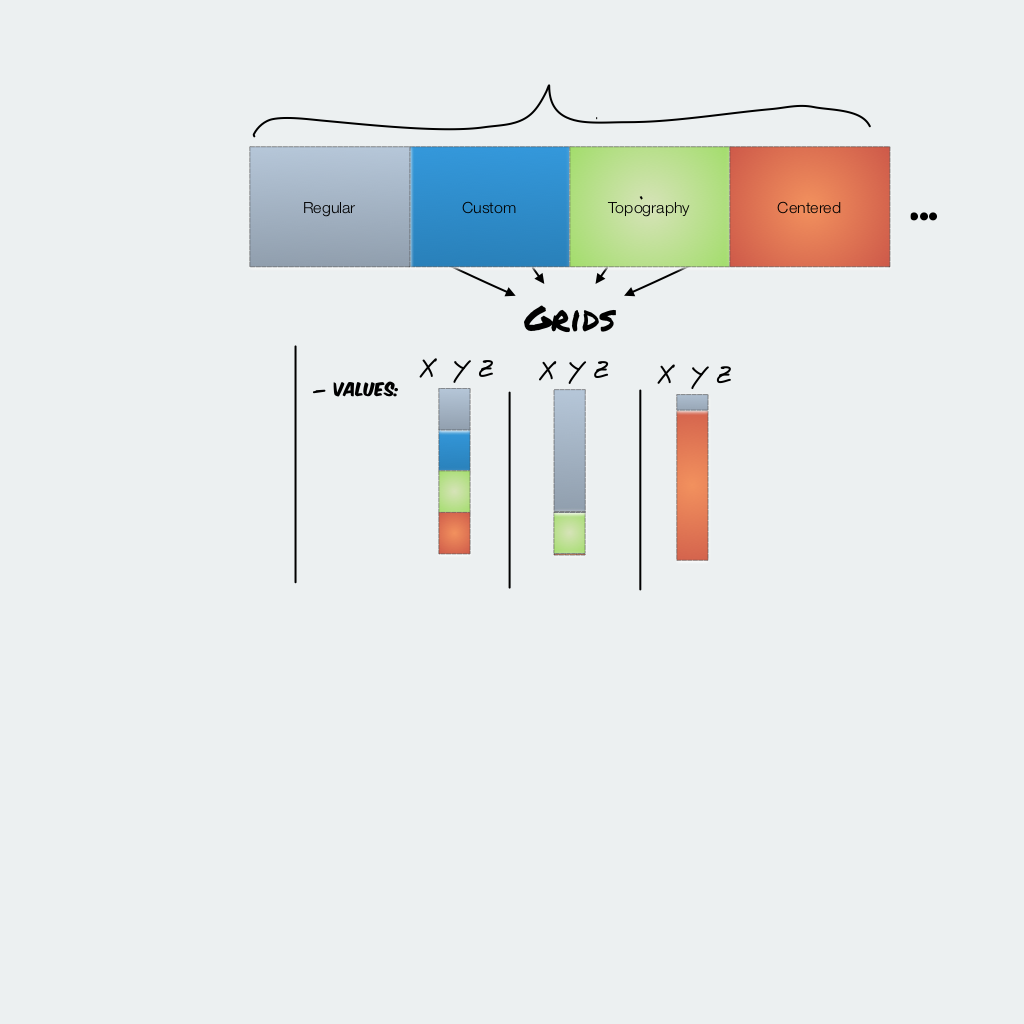

In [10]:
grid.values, grid.values_r

(array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=float64))

At the moment of writing this tutorial, there is 4 grid types. The number of grid types is scalable and down the road we aim to connect other grid packages (like Discretize) as an extra Grid type

In [11]:
grid.grid_types

array(['regular', 'custom', 'topography', 'gravity'], dtype='<U10')

Each grid type can be initialize ()

In [ ]:
grid.

In [12]:
grid.active_grids

array([ True, False, False, False])

In [7]:
grid.values

array([], shape=(0, 3), dtype=float64)

### Regular grid

In [10]:
grid.set_regular_grid([0,100,0,100,-100,0], [20,20,20])

In [11]:
grid.values

array([[  2.5,   2.5, -97.5],
       [  2.5,   2.5, -92.5],
       [  2.5,   2.5, -87.5],
       ...,
       [ 97.5,  97.5, -12.5],
       [ 97.5,  97.5,  -7.5],
       [ 97.5,  97.5,  -2.5]])

In [13]:
grid.active_grids

array([ True, False, False, False])

In [14]:
grid.length

array([   0, 8000, 8000, 8000, 8000])

### Topography

In [15]:
l0, l1 = grid.get_grid_args('topography')

In [16]:
grid.values[l0: l1]

array([], shape=(0, 3), dtype=float64)

Now we set topography

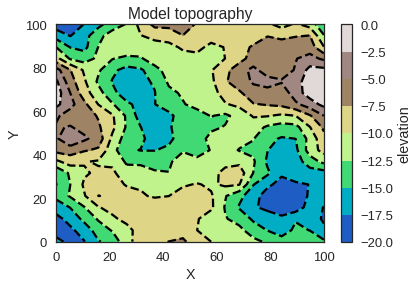

In [17]:
grid.set_topography()

In [18]:
grid.length[np.where(grid.grid_types == 'regular')[0]]

array([0])

In [19]:
grid.length

array([   0, 8000, 8000, 8400, 8400])

In [20]:
grid.values

array([[  2.5       ,   2.5       , -97.5       ],
       [  2.5       ,   2.5       , -92.5       ],
       [  2.5       ,   2.5       , -87.5       ],
       ...,
       [ 87.5       ,  97.5       ,  -9.62840807],
       [ 92.5       ,  97.5       , -11.00462662],
       [ 97.5       ,  97.5       , -14.655463  ]])

In [21]:
grid.deactivate_all_grids()
grid.update_grid_values()

In [22]:
grid.set_active('topography')

In [23]:
grid.set_active('regular')

In [24]:
grid.values.shape

(8400, 3)

### Other grids:

- Custom Grids: link to compute at
- gravity grid: Check tutorial 2.2-Cell-selection